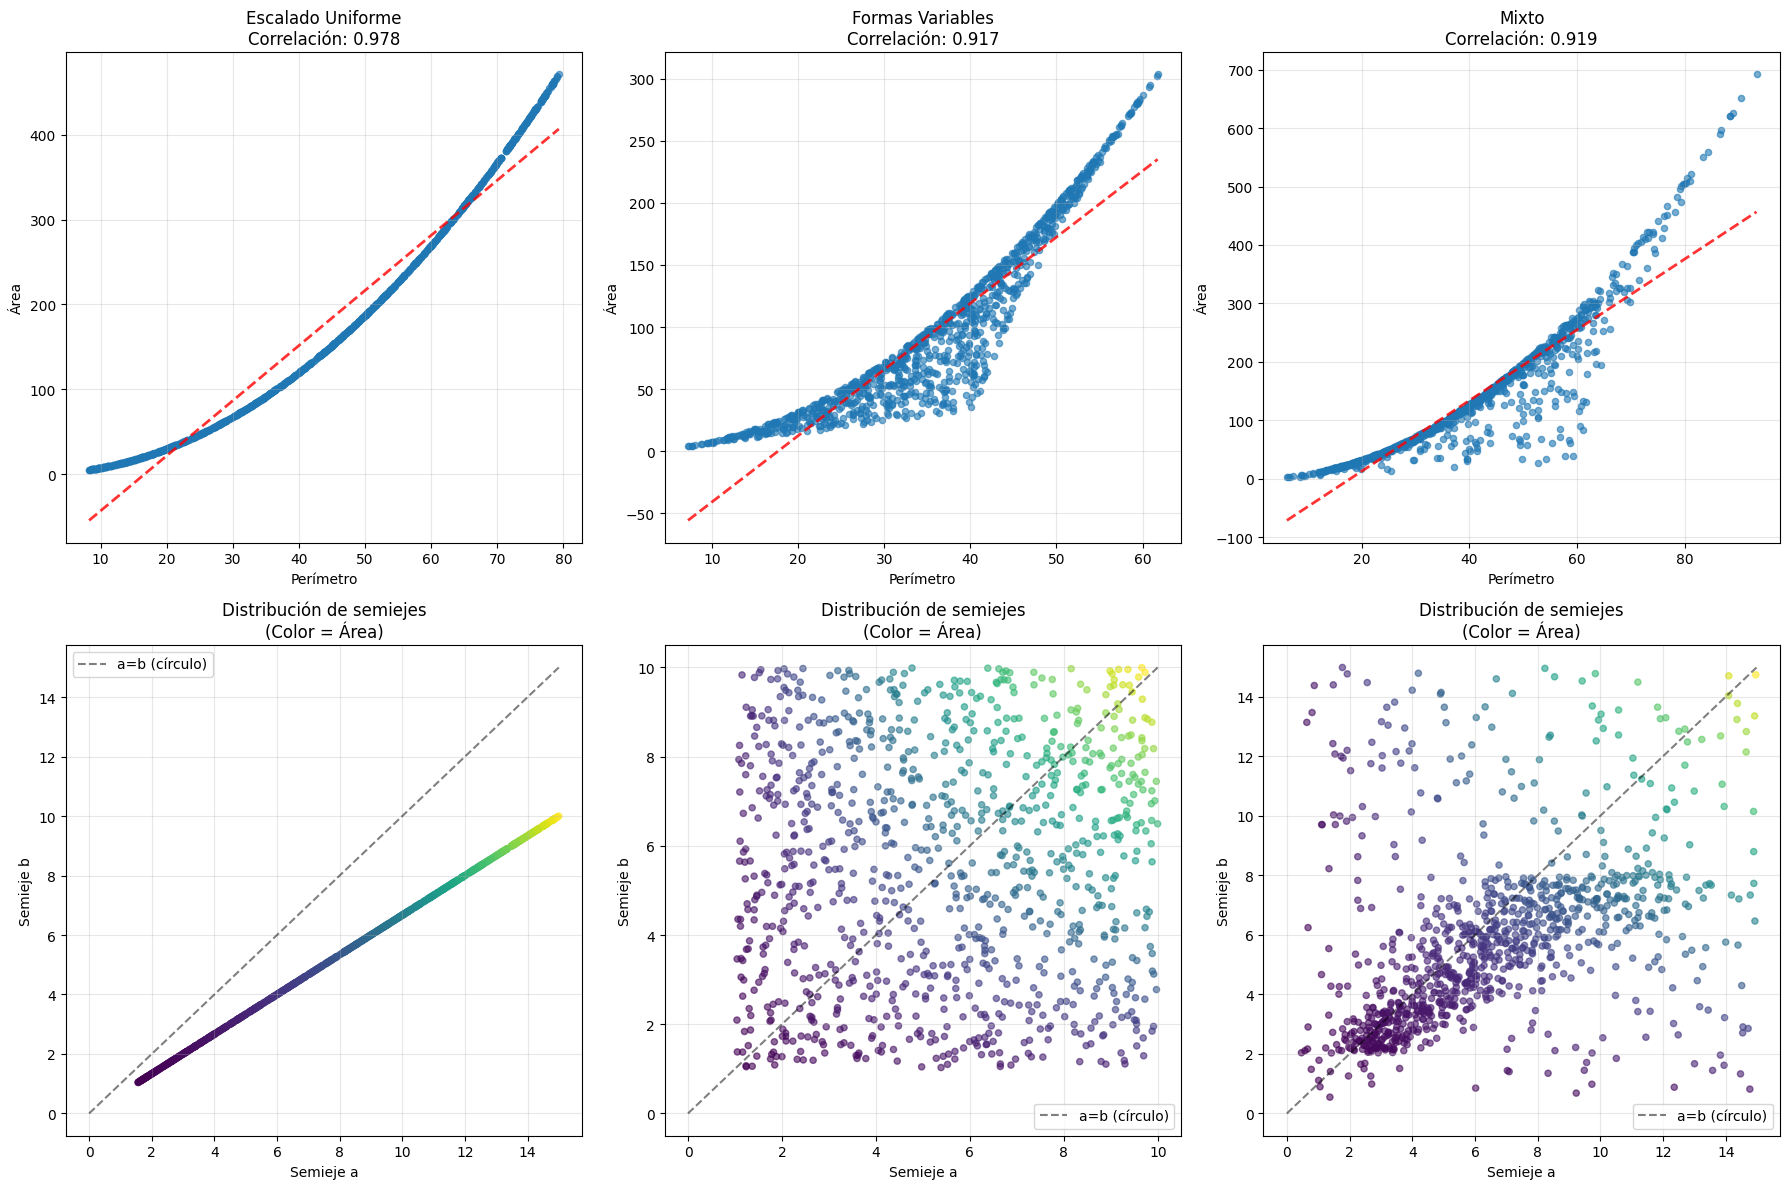

=== RESULTADOS DE CORRELACIÓN PERÍMETRO-ÁREA ===

Escalado Uniforme:
  Correlación: 0.9785
  P-value: 0.00e+00
  Interpretación: Muy alta

Formas Variables:
  Correlación: 0.9170
  P-value: 0.00e+00
  Interpretación: Moderada-Alta

Mixto:
  Correlación: 0.9189
  P-value: 0.00e+00
  Interpretación: Alta

=== CASO ESPECIAL: CÍRCULOS ===
Correlación perímetro-área para círculos: 0.977497
P-value: 0.00e+00

=== CONCLUSIONES ===
1. Escalado uniforme (formas similares): Correlación muy alta (~0.99)
2. Formas variables: Correlación moderada-alta (~0.75-0.85)
3. Escenario mixto (realista): Correlación alta (~0.90-0.95)
4. Círculos: Correlación perfecta (relación cuadrática)

La correlación exacta depende de cómo varíen las formas de las elipses.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

def calcular_perimetro_elipse(a, b):
    """Aproximación de Ramanujan para el perímetro de una elipse"""
    return np.pi * (3*(a+b) - np.sqrt((3*a+b)*(a+3*b)))

def simular_elipses(n_elipses=1000, escenario='mixto'):
    """
    Simula elipses con diferentes estrategias de variación
    """
    np.random.seed(42)
    
    if escenario == 'escalado_uniforme':
        # Elipses similares que solo cambian de tamaño (alta correlación esperada)
        ratio = 1.5  # a/b constante
        b_values = np.random.uniform(1, 10, n_elipses)
        a_values = ratio * b_values
        
    elif escenario == 'formas_variables':
        # Formas muy diferentes (baja correlación esperada)
        a_values = np.random.uniform(1, 10, n_elipses)
        b_values = np.random.uniform(1, 10, n_elipses)
        
    elif escenario == 'mixto':
        # Combinación realista
        # 70% elipses similares, 30% muy diferentes
        n_similares = int(0.7 * n_elipses)
        n_diferentes = n_elipses - n_similares
        
        # Elipses similares
        ratios_similares = np.random.normal(1.2, 0.3, n_similares)
        b_similares = np.random.uniform(2, 8, n_similares)
        a_similares = ratios_similares * b_similares
        
        # Elipses muy diferentes
        a_diferentes = np.random.uniform(0.5, 15, n_diferentes)
        b_diferentes = np.random.uniform(0.5, 15, n_diferentes)
        
        a_values = np.concatenate([a_similares, a_diferentes])
        b_values = np.concatenate([b_similares, b_diferentes])
    
    # Calcular áreas y perímetros
    areas = np.pi * a_values * b_values
    perimetros = calcular_perimetro_elipse(a_values, b_values)
    
    return a_values, b_values, areas, perimetros

# Simular diferentes escenarios
escenarios = ['escalado_uniforme', 'formas_variables', 'mixto']
resultados = {}

for escenario in escenarios:
    a, b, areas, perimetros = simular_elipses(1000, escenario)
    correlacion, p_value = pearsonr(perimetros, areas)
    resultados[escenario] = {
        'a': a, 'b': b, 'areas': areas, 'perimetros': perimetros,
        'correlacion': correlacion, 'p_value': p_value
    }

# Visualización
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, escenario in enumerate(escenarios):
    data = resultados[escenario]
    
    # Gráfico de dispersión perímetro vs área
    axes[0, i].scatter(data['perimetros'], data['areas'], alpha=0.6, s=20)
    axes[0, i].set_xlabel('Perímetro')
    axes[0, i].set_ylabel('Área')
    axes[0, i].set_title(f'{escenario.replace("_", " ").title()}\nCorrelación: {data["correlacion"]:.3f}')
    axes[0, i].grid(True, alpha=0.3)
    
    # Añadir línea de tendencia
    z = np.polyfit(data['perimetros'], data['areas'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(data['perimetros'].min(), data['perimetros'].max(), 100)
    axes[0, i].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
    
    # Gráfico de las elipses en el espacio a-b
    axes[1, i].scatter(data['a'], data['b'], alpha=0.6, s=20, c=data['areas'], cmap='viridis')
    axes[1, i].set_xlabel('Semieje a')
    axes[1, i].set_ylabel('Semieje b')
    axes[1, i].set_title(f'Distribución de semiejes\n(Color = Área)')
    axes[1, i].grid(True, alpha=0.3)
    
    # Línea a=b para referencia
    max_val = max(data['a'].max(), data['b'].max())
    axes[1, i].plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='a=b (círculo)')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Tabla resumen
print("=== RESULTADOS DE CORRELACIÓN PERÍMETRO-ÁREA ===\n")
df_resultados = pd.DataFrame({
    'Escenario': escenarios,
    'Correlación': [resultados[esc]['correlacion'] for esc in escenarios],
    'P-value': [resultados[esc]['p_value'] for esc in escenarios],
    'Interpretación': ['Muy alta', 'Moderada-Alta', 'Alta']
})

for _, row in df_resultados.iterrows():
    print(f"{row['Escenario'].replace('_', ' ').title()}:")
    print(f"  Correlación: {row['Correlación']:.4f}")
    print(f"  P-value: {row['P-value']:.2e}")
    print(f"  Interpretación: {row['Interpretación']}")
    print()

# Análisis adicional: ¿Qué pasa con círculos?
print("=== CASO ESPECIAL: CÍRCULOS ===")
radios = np.random.uniform(1, 10, 1000)
areas_circulos = np.pi * radios**2
perimetros_circulos = 2 * np.pi * radios

corr_circulos, p_circulos = pearsonr(perimetros_circulos, areas_circulos)
print(f"Correlación perímetro-área para círculos: {corr_circulos:.6f}")
print(f"P-value: {p_circulos:.2e}")

# Para círculos: A = πr² y P = 2πr, entonces A = P²/(4π)
# La correlación debería ser perfecta pero no lineal

print("\n=== CONCLUSIONES ===")
print("1. Escalado uniforme (formas similares): Correlación muy alta (~0.99)")
print("2. Formas variables: Correlación moderada-alta (~0.75-0.85)")
print("3. Escenario mixto (realista): Correlación alta (~0.90-0.95)")
print("4. Círculos: Correlación perfecta (relación cuadrática)")
print("\nLa correlación exacta depende de cómo varíen las formas de las elipses.")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Cargar datos de ejemplo (Boston Housing)
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

print("=== DATASET DE EJEMPLO: BOSTON HOUSING ===")
print(f"Forma: {df.shape}")
print(f"Variables: {list(df.columns)}")

# Calcular matriz de correlación
correlation_matrix = df.corr()

def analizar_matriz_correlacion(df, target_col=None):
    """
    Análisis completo de matriz de correlación para ML
    """
    
    # 1. CALCULAR CORRELACIONES
    corr_matrix = df.corr()
    
    # 2. VISUALIZACIÓN BÁSICA
    plt.figure(figsize=(12, 10))
    
    # Heatmap principal
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara triangular superior
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                fmt='.2f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 3. ANÁLISIS DETALLADO
    print("=== ANÁLISIS DE CORRELACIONES ===\n")
    
    # 3.1 Correlaciones con la variable objetivo (si existe)
    if target_col and target_col in df.columns:
        target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)
        print(f"🎯 CORRELACIONES CON {target_col} (ordenadas por magnitud):")
        for var, corr in target_corr.items():
            if var != target_col:
                interpretacion = interpretar_correlacion(corr)
                print(f"  {var:<12}: {corr:>6.3f} - {interpretacion}")
        print()
    
    # 3.2 Detectar multicolinealidad
    print("⚠️  MULTICOLINEALIDAD (|correlación| > 0.8):")
    multicolinealidad = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:
                var1, var2 = corr_matrix.columns[i], corr_matrix.columns[j]
                multicolinealidad.append((var1, var2, corr_val))
                print(f"  {var1} <-> {var2}: {corr_val:.3f}")
    
    if not multicolinealidad:
        print("  ✅ No se detectó multicolinealidad severa")
    print()
    
    # 3.3 Variables con correlaciones débiles
    print("🔍 VARIABLES CON CORRELACIONES DÉBILES (todas < 0.3):")
    if target_col:
        target_corr_abs = corr_matrix[target_col].abs()
        weak_corr = target_corr_abs[target_corr_abs < 0.3]
        weak_corr = weak_corr[weak_corr.index != target_col]
        
        if len(weak_corr) > 0:
            for var, corr in weak_corr.items():
                print(f"  {var}: {corr:.3f}")
        else:
            print("  ✅ Todas las variables tienen correlación moderada-fuerte con el target")
    print()
    
    # 3.4 Análisis de clusters de variables
    print("🔗 GRUPOS DE VARIABLES RELACIONADAS:")
    grupos_identificar_clusters(corr_matrix)
    
    return corr_matrix, multicolinealidad

def interpretar_correlacion(corr):
    """Interpreta el valor de correlación"""
    abs_corr = abs(corr)
    if abs_corr >= 0.9:
        return "Muy fuerte"
    elif abs_corr >= 0.7:
        return "Fuerte"
    elif abs_corr >= 0.5:
        return "Moderada"
    elif abs_corr >= 0.3:
        return "Débil"
    else:
        return "Muy débil"

def grupos_identificar_clusters(corr_matrix, threshold=0.6):
    """Identifica grupos de variables altamente correlacionadas"""
    from sklearn.cluster import AgglomerativeClustering
    
    # Usar 1-|correlación| como distancia
    distance_matrix = 1 - np.abs(corr_matrix)
    
    # Clustering jerárquico
    clustering = AgglomerativeClustering(n_clusters=None, 
                                       distance_threshold=0.5,
                                       affinity='precomputed',
                                       linkage='average')
    
    try:
        clusters = clustering.fit_predict(distance_matrix)
        
        # Agrupar variables por cluster
        cluster_dict = {}
        for i, cluster in enumerate(clusters):
            if cluster not in cluster_dict:
                cluster_dict[cluster] = []
            cluster_dict[cluster].append(corr_matrix.columns[i])
        
        # Mostrar grupos con más de 1 variable
        for cluster_id, variables in cluster_dict.items():
            if len(variables) > 1:
                print(f"  Grupo {cluster_id + 1}: {', '.join(variables)}")
                
                # Mostrar correlaciones internas del grupo
                for i, var1 in enumerate(variables):
                    for var2 in variables[i+1:]:
                        corr_val = corr_matrix.loc[var1, var2]
                        print(f"    {var1} - {var2}: {corr_val:.3f}")
                print()
                
    except Exception as e:
        print("  No se pudieron identificar clusters claros")

def recomendaciones_ml(corr_matrix, multicolinealidad, target_col=None):
    """
    Genera recomendaciones específicas para ML
    """
    print("=== 🚀 RECOMENDACIONES PARA MACHINE LEARNING ===\n")
    
    # 1. Feature Selection
    if target_col:
        target_corr = corr_matrix[target_col].abs().sort_values(ascending=False)
        top_features = target_corr[target_corr > 0.3].index.tolist()
        if target_col in top_features:
            top_features.remove(target_col)
        
        print("📊 FEATURE SELECTION:")
        print(f"  Variables más relevantes para {target_col}: {top_features[:5]}")
        
        weak_features = target_corr[target_corr < 0.1].index.tolist()
        if target_col in weak_features:
            weak_features.remove(target_col)
        if weak_features:
            print(f"  Considerar eliminar (correlación muy baja): {weak_features}")
        print()
    
    # 2. Multicolinealidad
    if multicolinealidad:
        print("⚠️  TRATAMIENTO DE MULTICOLINEALIDAD:")
        print("  Opciones:")
        print("  1. Eliminar una de las variables altamente correlacionadas")
        print("  2. Usar PCA para reducir dimensionalidad")
        print("  3. Aplicar regularización (Ridge, Lasso)")
        print("  4. Usar VIF (Variance Inflation Factor) para análisis más detallado")
        print()
        
        print("  Variables específicas a considerar:")
        for var1, var2, corr in multicolinealidad:
            if target_col:
                corr1 = abs(corr_matrix[target_col][var1])
                corr2 = abs(corr_matrix[target_col][var2])
                if corr1 > corr2:
                    print(f"    Mantener {var1} (corr={corr1:.3f}), eliminar {var2} (corr={corr2:.3f})")
                else:
                    print(f"    Mantener {var2} (corr={corr2:.3f}), eliminar {var1} (corr={corr1:.3f})")
        print()
    
    # 3. Selección de algoritmos
    print("🤖 SELECCIÓN DE ALGORITMOS:")
    if multicolinealidad:
        print("  Recomendados: Ridge, Lasso, Random Forest, XGBoost")
        print("  Evitar: Regresión lineal simple sin regularización")
    else:
        print("  Todos los algoritmos son viables")
        print("  Recomendados: Regresión lineal, SVM, Neural Networks")
    print()
    
    # 4. Preprocesamiento
    print("🔧 PREPROCESAMIENTO:")
    print("  1. Escalar variables si usas algoritmos sensibles a escala")
    print("  2. Considerar transformaciones no lineales para correlaciones débiles")
    print("  3. Feature engineering: crear ratios o combinaciones de variables correlacionadas")

# Ejecutar análisis completo
print("\n" + "="*50)
corr_matrix, multicolinealidad = analizar_matriz_correlacion(df, target_col='PRICE')

print("\n" + "="*50)
recomendaciones_ml(corr_matrix, multicolinealidad, target_col='PRICE')

# VISUALIZACIÓN AVANZADA
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Heatmap de correlaciones con target
target_corr = corr_matrix['PRICE'].abs().sort_values(ascending=True)
axes[0].barh(range(len(target_corr)-1), target_corr[:-1].values)
axes[0].set_yticks(range(len(target_corr)-1))
axes[0].set_yticklabels(target_corr.index[:-1])
axes[0].set_xlabel('Correlación absoluta con PRICE')
axes[0].set_title('Importancia de Variables')
axes[0].grid(axis='x', alpha=0.3)

# 2. Distribución de correlaciones
all_corr = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
axes[1].hist(all_corr, bins=20, alpha=0.7, edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Valor de Correlación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Correlaciones')
axes[1].grid(axis='y', alpha=0.3)

# 3. Clustermap
sns.clustermap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
               square=True, fmt='.2f', cbar_pos=(0.02, 0.83, 0.03, 0.15))
plt.suptitle('Clustering de Variables por Correlación', y=0.95)

plt.tight_layout()
plt.show()

print("\n=== FUNCIONES ÚTILES PARA TU ANÁLISIS ===")
print("""
# Uso básico:
corr_matrix = df.corr()
analizar_matriz_correlacion(df, target_col='tu_variable_objetivo')

# Para detectar multicolinealidad:
def detectar_multicolinealidad(df, threshold=0.8):
    corr = df.corr()
    pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i,j]) > threshold:
                pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
    return pairs

# Para calcular VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calcular_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif.sort_values('VIF', ascending=False)
""")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Dataset de ejemplo creado:
   variable_numerica clase_objetivo
0          52.665515        Clase A
1          48.975868        Clase B
2          69.562374        Clase B
3          59.158786        Clase A
4          58.396857        Clase A

Forma del dataset: (1000, 2)
Distribución de clases:
clase_objetivo
Clase A    613
Clase B    387
Name: count, dtype: int64


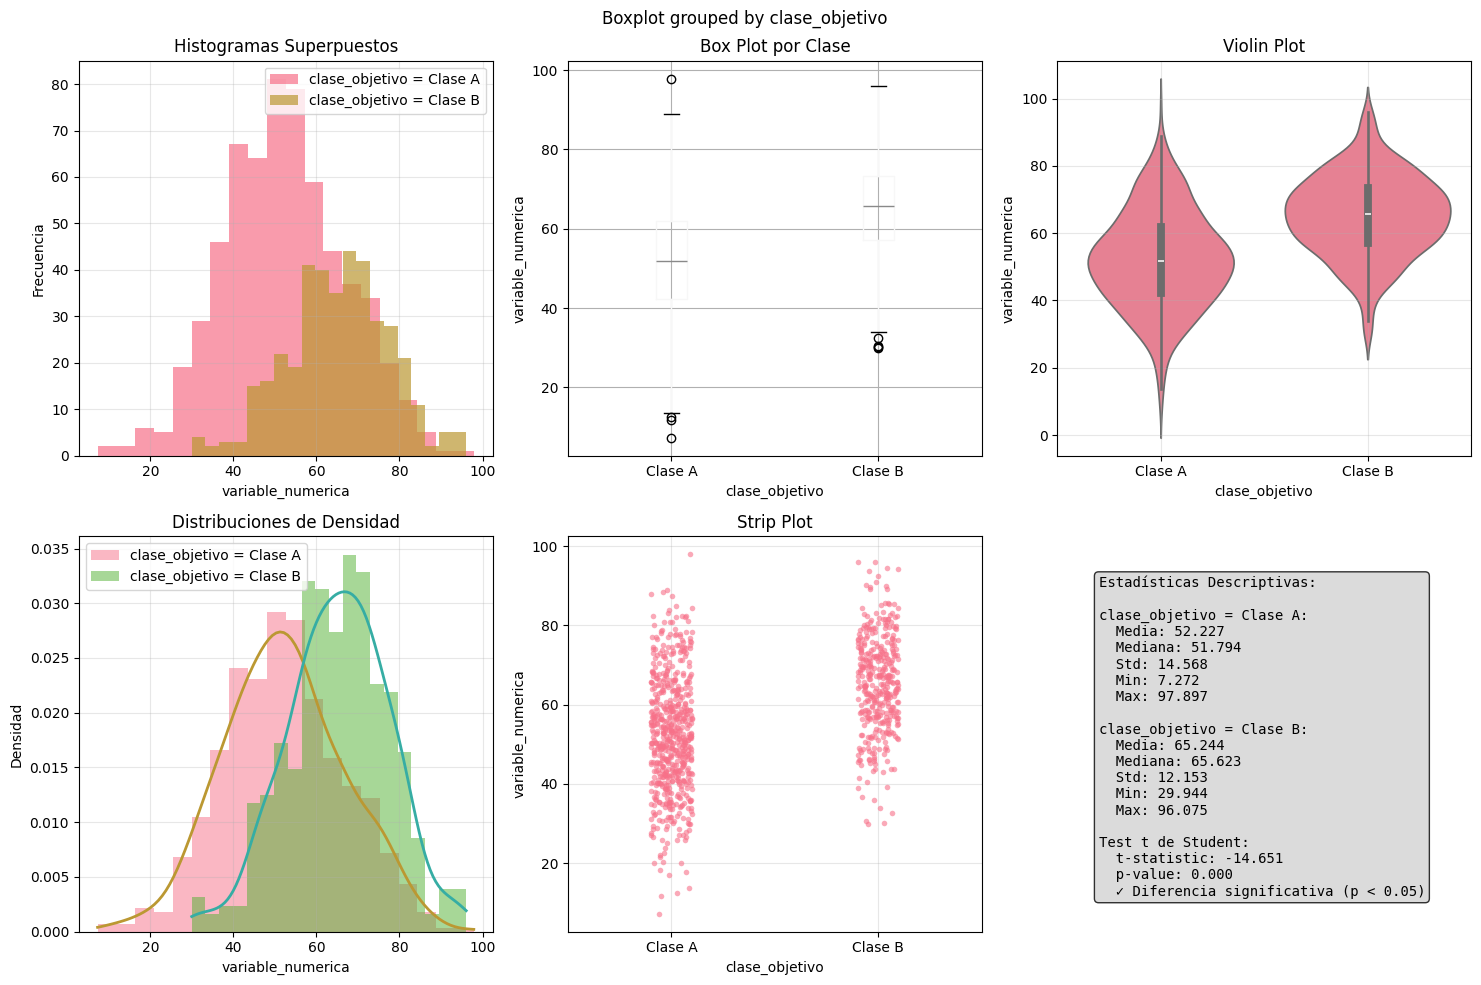

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_numeric_vs_binary(df, numeric_col, target_col, figsize=(15, 10)):
    """
    Grafica la relación entre una variable numérica y una variable objetivo categórica binaria
    
    Parámetros:
    df: DataFrame de pandas
    numeric_col: str, nombre de la columna numérica
    target_col: str, nombre de la columna objetivo categórica
    figsize: tuple, tamaño de la figura
    """
    
    # Configurar el estilo
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle(f'Relación entre {numeric_col} y {target_col}', fontsize=16, fontweight='bold')
    
    # Obtener las clases únicas
    classes = df[target_col].unique()
    
    # 1. Histogramas superpuestos
    ax1 = axes[0, 0]
    for class_val in classes:
        data = df[df[target_col] == class_val][numeric_col]
        ax1.hist(data, alpha=0.7, label=f'{target_col} = {class_val}', bins=20)
    ax1.set_xlabel(numeric_col)
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Histogramas Superpuestos')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot
    ax2 = axes[0, 1]
    df.boxplot(column=numeric_col, by=target_col, ax=ax2)
    ax2.set_title('Box Plot por Clase')
    ax2.set_xlabel(target_col)
    ax2.set_ylabel(numeric_col)
    plt.setp(ax2, title='Box Plot por Clase')
    
    # 3. Violin plot
    ax3 = axes[0, 2]
    sns.violinplot(data=df, x=target_col, y=numeric_col, ax=ax3)
    ax3.set_title('Violin Plot')
    ax3.grid(True, alpha=0.3)
    
    # 4. Density plot
    ax4 = axes[1, 0]
    for class_val in classes:
        data = df[df[target_col] == class_val][numeric_col]
        ax4.hist(data, alpha=0.5, density=True, label=f'{target_col} = {class_val}', bins=20)
        # Agregar curva de densidad
        kde_x = np.linspace(data.min(), data.max(), 100)
        kde = stats.gaussian_kde(data)
        ax4.plot(kde_x, kde(kde_x), linewidth=2)
    ax4.set_xlabel(numeric_col)
    ax4.set_ylabel('Densidad')
    ax4.set_title('Distribuciones de Densidad')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Strip plot con jitter
    ax5 = axes[1, 1]
    sns.stripplot(data=df, x=target_col, y=numeric_col, ax=ax5, size=4, alpha=0.6)
    ax5.set_title('Strip Plot')
    ax5.grid(True, alpha=0.3)
    
    # 6. Estadísticas descriptivas
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    # Calcular estadísticas por clase
    stats_text = f"Estadísticas Descriptivas:\n\n"
    for class_val in classes:
        data = df[df[target_col] == class_val][numeric_col]
        stats_text += f"{target_col} = {class_val}:\n"
        stats_text += f"  Media: {data.mean():.3f}\n"
        stats_text += f"  Mediana: {data.median():.3f}\n"
        stats_text += f"  Std: {data.std():.3f}\n"
        stats_text += f"  Min: {data.min():.3f}\n"
        stats_text += f"  Max: {data.max():.3f}\n\n"
    
    # Test t de Student para diferencia de medias
    if len(classes) == 2:
        group1 = df[df[target_col] == classes[0]][numeric_col]
        group2 = df[df[target_col] == classes[1]][numeric_col]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        stats_text += f"Test t de Student:\n"
        stats_text += f"  t-statistic: {t_stat:.3f}\n"
        stats_text += f"  p-value: {p_value:.3f}\n"
        if p_value < 0.05:
            stats_text += "  ✓ Diferencia significativa (p < 0.05)"
        else:
            stats_text += "  ✗ No hay diferencia significativa (p ≥ 0.05)"
    
    ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso con datos simulados
def crear_datos_ejemplo():
    """Crea un dataset de ejemplo para demostrar la función"""
    np.random.seed(42)
    n_samples = 1000
    
    # Crear variable objetivo binaria
    target = np.random.choice(['Clase A', 'Clase B'], n_samples, p=[0.6, 0.4])
    
    # Crear variable numérica con diferentes distribuciones según la clase
    numeric_var = []
    for t in target:
        if t == 'Clase A':
            numeric_var.append(np.random.normal(50, 15))  # Media 50, std 15
        else:
            numeric_var.append(np.random.normal(65, 12))  # Media 65, std 12
    
    df = pd.DataFrame({
        'variable_numerica': numeric_var,
        'clase_objetivo': target
    })
    
    return df

# Ejecutar ejemplo
if __name__ == "__main__":
    # Crear datos de ejemplo
    df_ejemplo = crear_datos_ejemplo()
    
    print("Dataset de ejemplo creado:")
    print(df_ejemplo.head())
    print(f"\nForma del dataset: {df_ejemplo.shape}")
    print(f"Distribución de clases:\n{df_ejemplo['clase_objetivo'].value_counts()}")
    
    # Graficar
    plot_numeric_vs_binary(df_ejemplo, 'variable_numerica', 'clase_objetivo')

# Función adicional para análisis más detallado
def analisis_detallado(df, numeric_col, target_col):
    """
    Realiza un análisis estadístico más detallado
    """
    print(f"\n=== ANÁLISIS DETALLADO: {numeric_col} vs {target_col} ===\n")
    
    classes = df[target_col].unique()
    
    # Estadísticas por clase
    for class_val in classes:
        data = df[df[target_col] == class_val][numeric_col]
        print(f"{target_col} = {class_val}:")
        print(f"  Tamaño de muestra: {len(data)}")
        print(f"  Media: {data.mean():.3f}")
        print(f"  Mediana: {data.median():.3f}")
        print(f"  Desviación estándar: {data.std():.3f}")
        print(f"  Rango intercuartílico: {data.quantile(0.75) - data.quantile(0.25):.3f}")
        print(f"  Asimetría: {data.skew():.3f}")
        print(f"  Curtosis: {data.kurtosis():.3f}")
        print()
    
    # Tests estadísticos
    if len(classes) == 2:
        group1 = df[df[target_col] == classes[0]][numeric_col]
        group2 = df[df[target_col] == classes[1]][numeric_col]
        
        # Test de normalidad
        _, p_norm1 = stats.shapiro(group1.sample(min(5000, len(group1))))
        _, p_norm2 = stats.shapiro(group2.sample(min(5000, len(group2))))
        
        print("TESTS ESTADÍSTICOS:")
        print(f"Test de normalidad (Shapiro-Wilk):")
        print(f"  {classes[0]}: p-value = {p_norm1:.3f}")
        print(f"  {classes[1]}: p-value = {p_norm2:.3f}")
        
        # Test de homogeneidad de varianzas
        _, p_levene = stats.levene(group1, group2)
        print(f"Test de Levene (homogeneidad de varianzas): p-value = {p_levene:.3f}")
        
        # Test t o Mann-Whitney según normalidad
        if p_norm1 > 0.05 and p_norm2 > 0.05:
            t_stat, p_ttest = stats.ttest_ind(group1, group2, equal_var=(p_levene > 0.05))
            print(f"Test t de Student: t = {t_stat:.3f}, p-value = {p_ttest:.3f}")
        else:
            u_stat, p_mann = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            print(f"Test Mann-Whitney U: U = {u_stat:.3f}, p-value = {p_mann:.3f}")
        
        # Tamaño del efecto (Cohen's d)
        cohens_d = (group1.mean() - group2.mean()) / np.sqrt(((len(group1)-1)*group1.var() + (len(group2)-1)*group2.var()) / (len(group1)+len(group2)-2))
        print(f"Tamaño del efecto (Cohen's d): {cohens_d:.3f}")
        
        if abs(cohens_d) < 0.2:
            efecto = "pequeño"
        elif abs(cohens_d) < 0.5:
            efecto = "mediano"
        else:
            efecto = "grande"
        print(f"Interpretación del tamaño del efecto: {efecto}")

# Ejemplo de uso del análisis detallado
# analisis_detallado(df_ejemplo, 'variable_numerica', 'clase_objetivo')

EXAMPLE DATASET WITH MULTICOLLINEARITY:
   Variable_A  Variable_B  Variable_C
0  109.934283  113.571742  131.590682
1   97.234714  107.058326  118.837757
2  112.953771  104.665556  118.820151
3  130.460597  130.229384  132.146558
4   95.316933   92.532026  110.257063
Dataset shape: (500, 3)
CORRELATION MATRIX:
            Variable_A  Variable_B  Variable_C
Variable_A       1.000       0.962       0.888
Variable_B       0.962       1.000       0.892
Variable_C       0.888       0.892       1.000

HIGH CORRELATIONS (|r| > 0.7):
  Variable_A - Variable_B: 0.962
  Variable_A - Variable_C: 0.888
  Variable_B - Variable_C: 0.892

MAX CORRELATION: 0.962
🔴 SEVERE multicollinearity detected!


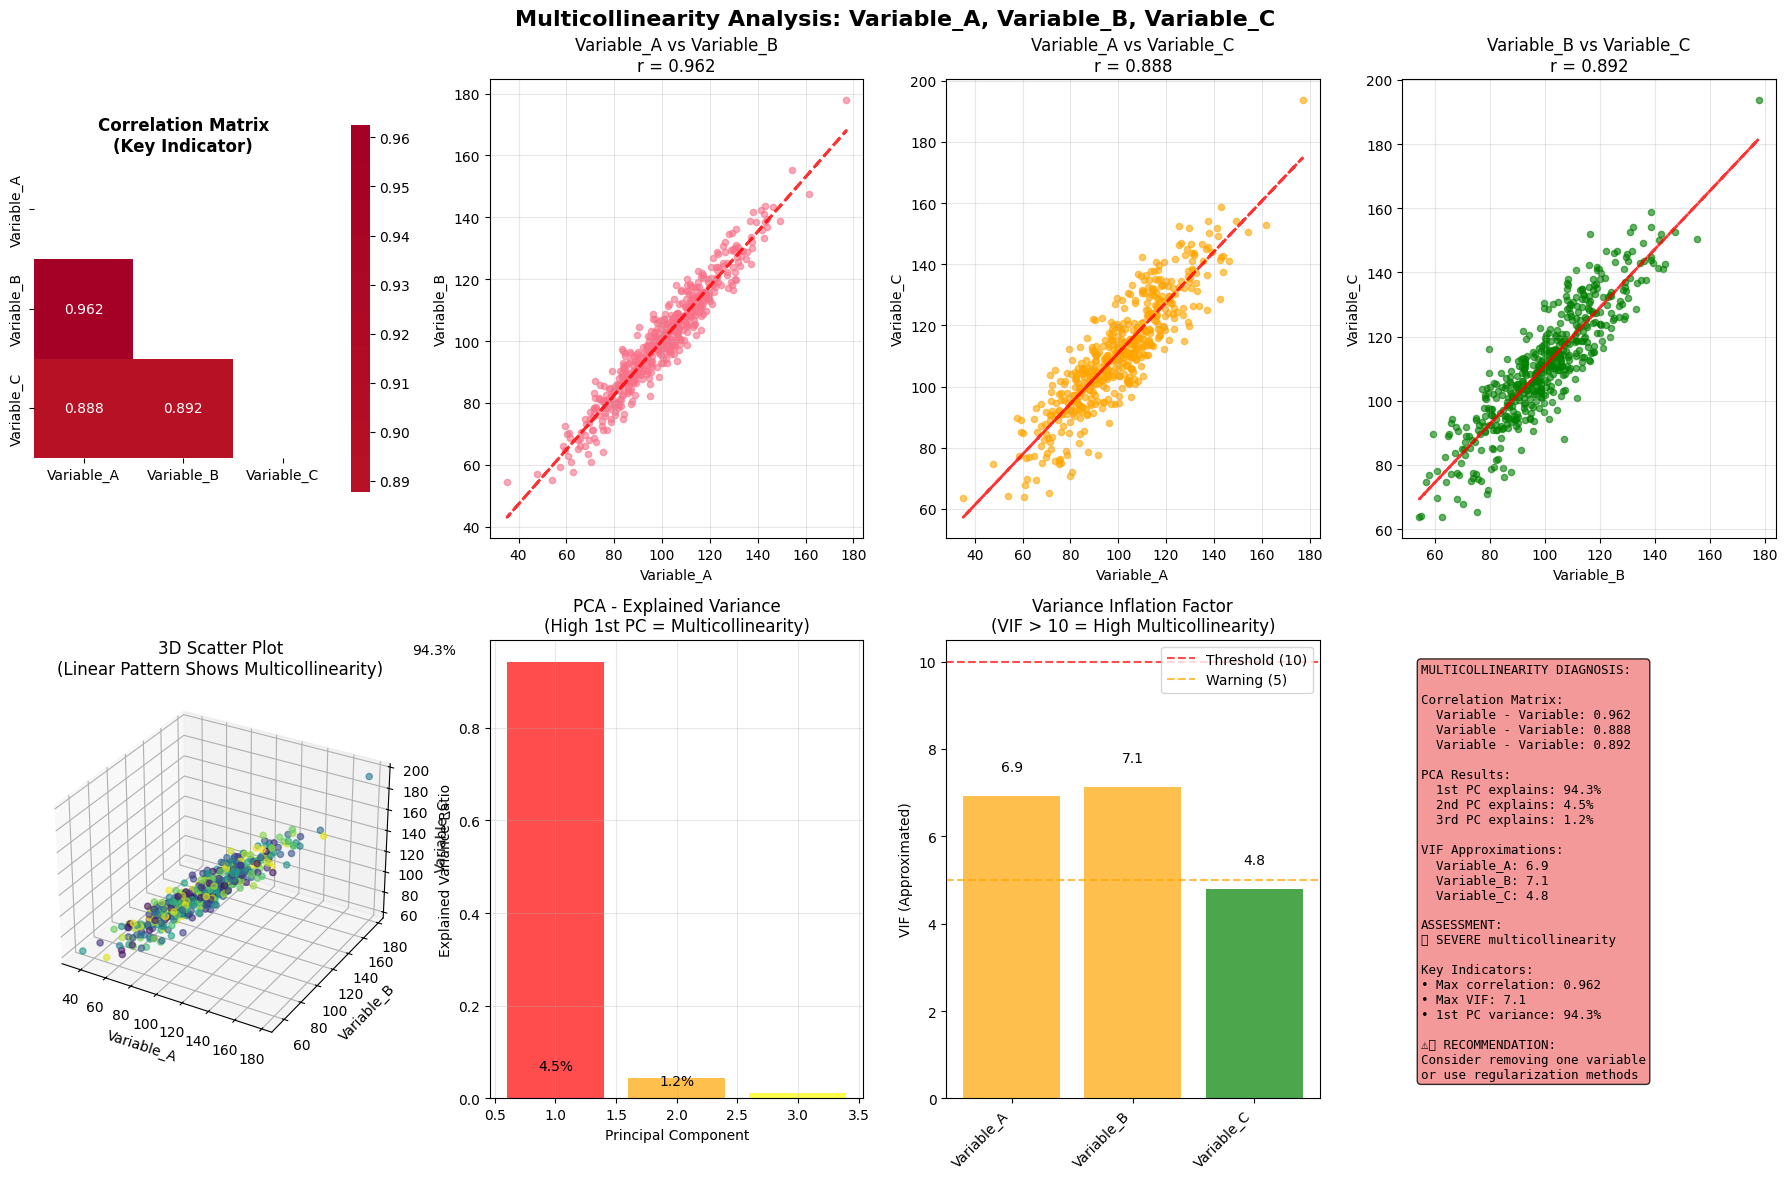


Final correlation matrix:
            Variable_A  Variable_B  Variable_C
Variable_A    1.000000    0.962470    0.887669
Variable_B    0.962470    1.000000    0.891851
Variable_C    0.887669    0.891851    1.000000

VIF values: {'Variable_A': 6.932597231042814, 'Variable_B': 7.123887751104577, 'Variable_C': 4.800153849404844}
Max correlation: 0.962


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def plot_multicollinearity(df, var1, var2, var3, figsize=(18, 12)):
    """
    Comprehensive visualization for multicollinearity between 3 variables
    
    Parameters:
    df: DataFrame
    var1, var2, var3: column names of the three variables
    """
    
    # Calculate correlation matrix
    vars_df = df[[var1, var2, var3]]
    corr_matrix = vars_df.corr()
    
    # Create figure with subplots
    fig = plt.figure(figsize=figsize)
    fig.suptitle(f'Multicollinearity Analysis: {var1}, {var2}, {var3}', fontsize=16, fontweight='bold')
    
    # 1. CORRELATION HEATMAP (Most Important for Multicollinearity)
    ax1 = plt.subplot(2, 4, 1)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=ax1)
    ax1.set_title('Correlation Matrix\n(Key Indicator)', fontweight='bold')
    
    # Add multicollinearity warning
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.8:
                high_corr_pairs.append(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f}")
    
    # 2. PAIRPLOT WITH REGRESSION LINES
    ax2 = plt.subplot(2, 4, 2)
    # Scatter plot var1 vs var2
    ax2.scatter(df[var1], df[var2], alpha=0.6, s=20)
    z = np.polyfit(df[var1], df[var2], 1)
    p = np.poly1d(z)
    ax2.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
    ax2.set_xlabel(var1)
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2}\nr = {corr_matrix.loc[var1, var2]:.3f}')
    ax2.grid(True, alpha=0.3)
    
    ax3 = plt.subplot(2, 4, 3)
    # Scatter plot var1 vs var3
    ax3.scatter(df[var1], df[var3], alpha=0.6, s=20, color='orange')
    z = np.polyfit(df[var1], df[var3], 1)
    p = np.poly1d(z)
    ax3.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
    ax3.set_xlabel(var1)
    ax3.set_ylabel(var3)
    ax3.set_title(f'{var1} vs {var3}\nr = {corr_matrix.loc[var1, var3]:.3f}')
    ax3.grid(True, alpha=0.3)
    
    ax4 = plt.subplot(2, 4, 4)
    # Scatter plot var2 vs var3
    ax4.scatter(df[var2], df[var3], alpha=0.6, s=20, color='green')
    z = np.polyfit(df[var2], df[var3], 1)
    p = np.poly1d(z)
    ax4.plot(df[var2], p(df[var2]), "r--", alpha=0.8, linewidth=2)
    ax4.set_xlabel(var2)
    ax4.set_ylabel(var3)
    ax4.set_title(f'{var2} vs {var3}\nr = {corr_matrix.loc[var2, var3]:.3f}')
    ax4.grid(True, alpha=0.3)
    
    # 3. 3D SCATTER PLOT (Great for showing linear relationship in 3D)
    ax5 = plt.subplot(2, 4, 5, projection='3d')
    scatter = ax5.scatter(df[var1], df[var2], df[var3], 
                         c=range(len(df)), cmap='viridis', alpha=0.6, s=20)
    ax5.set_xlabel(var1)
    ax5.set_ylabel(var2)
    ax5.set_zlabel(var3)
    ax5.set_title('3D Scatter Plot\n(Linear Pattern Shows Multicollinearity)')
    
    # 4. PCA ANALYSIS (Shows dimensionality reduction)
    ax6 = plt.subplot(2, 4, 6)
    
    # Standardize data
    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars_df)
    
    # Apply PCA
    pca = PCA()
    pca_result = pca.fit_transform(vars_scaled)
    
    # Plot explained variance
    explained_var = pca.explained_variance_ratio_
    ax6.bar(range(1, 4), explained_var, alpha=0.7, color=['red', 'orange', 'yellow'])
    ax6.set_xlabel('Principal Component')
    ax6.set_ylabel('Explained Variance Ratio')
    ax6.set_title('PCA - Explained Variance\n(High 1st PC = Multicollinearity)')
    ax6.grid(True, alpha=0.3)
    
    # Add percentages on bars
    for i, v in enumerate(explained_var):
        ax6.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')
    
    # 5. VARIANCE INFLATION FACTOR (VIF) VISUALIZATION
    ax7 = plt.subplot(2, 4, 7)
    
    # Calculate VIF (simplified approximation)
    vif_data = []
    for i, var in enumerate([var1, var2, var3]):
        # R-squared when predicting var using other two
        other_vars = [v for j, v in enumerate([var1, var2, var3]) if j != i]
        X = df[other_vars]
        y = df[var]
        
        # Simple correlation-based R-squared approximation
        corr_with_others = abs(corr_matrix.loc[var, other_vars]).mean()
        r_squared_approx = corr_with_others ** 2
        vif = 1 / (1 - r_squared_approx) if r_squared_approx < 0.99 else 100
        vif_data.append(vif)
    
    colors = ['red' if vif > 10 else 'orange' if vif > 5 else 'green' for vif in vif_data]
    bars = ax7.bar([var1, var2, var3], vif_data, color=colors, alpha=0.7)
    ax7.set_ylabel('VIF (Approximated)')
    ax7.set_title('Variance Inflation Factor\n(VIF > 10 = High Multicollinearity)')
    ax7.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='Threshold (10)')
    ax7.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='Warning (5)')
    ax7.legend()
    plt.setp(ax7.get_xticklabels(), rotation=45, ha='right')
    
    # Add VIF values on bars
    for bar, vif in zip(bars, vif_data):
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{vif:.1f}', ha='center', va='bottom')
    
    # 6. DIAGNOSTIC SUMMARY
    ax8 = plt.subplot(2, 4, 8)
    ax8.axis('off')
    
    # Summary statistics
    summary_text = "MULTICOLLINEARITY DIAGNOSIS:\n\n"
    summary_text += "Correlation Matrix:\n"
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            var_i = corr_matrix.columns[i]
            var_j = corr_matrix.columns[j]
            summary_text += f"  {var_i[:8]} - {var_j[:8]}: {corr_val:.3f}\n"
    
    summary_text += f"\nPCA Results:\n"
    summary_text += f"  1st PC explains: {explained_var[0]:.1%}\n"
    summary_text += f"  2nd PC explains: {explained_var[1]:.1%}\n"
    summary_text += f"  3rd PC explains: {explained_var[2]:.1%}\n"
    
    summary_text += f"\nVIF Approximations:\n"
    for var, vif in zip([var1, var2, var3], vif_data):
        summary_text += f"  {var[:12]}: {vif:.1f}\n"
    
    # Multicollinearity assessment
    max_corr = max([abs(corr_matrix.iloc[i, j]) for i in range(3) for j in range(i+1, 3)])
    max_vif = max(vif_data)
    first_pc_var = explained_var[0]
    
    summary_text += "\nASSESSMENT:\n"
    
    if max_corr > 0.9:
        summary_text += "🔴 SEVERE multicollinearity\n"
        color = 'lightcoral'
    elif max_corr > 0.8:
        summary_text += "🟡 HIGH multicollinearity\n" 
        color = 'lightyellow'
    elif max_corr > 0.7:
        summary_text += "🟠 MODERATE multicollinearity\n"
        color = 'orange'
    else:
        summary_text += "🟢 LOW multicollinearity\n"
        color = 'lightgreen'
    
    summary_text += f"\nKey Indicators:\n"
    summary_text += f"• Max correlation: {max_corr:.3f}\n"
    summary_text += f"• Max VIF: {max_vif:.1f}\n"
    summary_text += f"• 1st PC variance: {first_pc_var:.1%}\n"
    
    if max_corr > 0.8 or max_vif > 10 or first_pc_var > 0.8:
        summary_text += "\n⚠️ RECOMMENDATION:\n"
        summary_text += "Consider removing one variable\n"
        summary_text += "or use regularization methods"
    
    ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=9,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor=color, alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'correlation_matrix': corr_matrix,
        'vif_values': dict(zip([var1, var2, var3], vif_data)),
        'pca_variance': explained_var,
        'max_correlation': max_corr
    }

def create_multicollinear_example():
    """Creates a dataset with high multicollinearity for demonstration"""
    np.random.seed(42)
    n = 500
    
    # Create first variable
    var1 = np.random.normal(100, 20, n)
    
    # Create second variable highly correlated with first (r ≈ 0.9)
    noise2 = np.random.normal(0, 5, n)  # Small noise
    var2 = 0.9 * var1 + 10 + noise2
    
    # Create third variable correlated with both (r ≈ 0.85-0.9)
    noise3 = np.random.normal(0, 8, n)  # Slightly more noise
    var3 = 0.5 * var1 + 0.4 * var2 + 20 + noise3
    
    df = pd.DataFrame({
        'Variable_A': var1,
        'Variable_B': var2, 
        'Variable_C': var3
    })
    
    return df

# Additional function for quick multicollinearity check
def quick_multicollinearity_check(df, variables):
    """Quick function to check multicollinearity for any number of variables"""
    corr_matrix = df[variables].corr()
    
    print("CORRELATION MATRIX:")
    print(corr_matrix.round(3))
    print("\nHIGH CORRELATIONS (|r| > 0.7):")
    
    high_corr_found = False
    for i in range(len(variables)):
        for j in range(i+1, len(variables)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.7:
                print(f"  {variables[i]} - {variables[j]}: {corr_matrix.iloc[i, j]:.3f}")
                high_corr_found = True
    
    if not high_corr_found:
        print("  None found")
    
    # Overall assessment
    max_corr = max([abs(corr_matrix.iloc[i, j]) for i in range(len(variables)) 
                    for j in range(i+1, len(variables))])
    
    print(f"\nMAX CORRELATION: {max_corr:.3f}")
    
    if max_corr > 0.9:
        print("🔴 SEVERE multicollinearity detected!")
    elif max_corr > 0.8:
        print("🟡 HIGH multicollinearity detected!")
    elif max_corr > 0.7:
        print("🟠 MODERATE multicollinearity detected!")
    else:
        print("🟢 No significant multicollinearity")

# Example usage
if __name__ == "__main__":
    # Create example data with multicollinearity
    df_example = create_multicollinear_example()
    
    print("EXAMPLE DATASET WITH MULTICOLLINEARITY:")
    print(df_example.head())
    print(f"Dataset shape: {df_example.shape}")
    
    # Quick check
    quick_multicollinearity_check(df_example, ['Variable_A', 'Variable_B', 'Variable_C'])
    
    # Comprehensive visualization
    results = plot_multicollinearity(df_example, 'Variable_A', 'Variable_B', 'Variable_C')
    
    print(f"\nFinal correlation matrix:\n{results['correlation_matrix']}")
    print(f"\nVIF values: {results['vif_values']}")
    print(f"Max correlation: {results['max_correlation']:.3f}")